In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font size='6'>LOADING DATA</font>

In [4]:
cities = pd.read_csv('cities.csv', header=0)
colleges = pd.read_csv('Colleges.csv', header=0)
data = pd.read_csv('ML case Study.csv', header=0)

In [5]:
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [6]:
colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [7]:
data.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [8]:
data.shape, colleges.shape, cities.shape

((1589, 8), (28, 3), (9, 2))

<font size='6'>EXTRACTING AND RESHAPING </font>

In [10]:
#College name is extracted from College dataframe and rename it to college_name and add a new column having named college_tier
#Highest weightage i.e. 3 goes to Tier1, 2 goes to Tier2 and 1 goes to Tier3
#College Tier are Ordinal Categorical Variables
tier1_df = colleges[['Tier 1']].rename(columns={'Tier 1': 'college_name'})
tier1_df['college_tier'] = 3

tier2_df = colleges[['Tier 2']].rename(columns={'Tier 2': 'college_name'})
tier2_df['college_tier'] = 2

tier3_df = colleges[['Tier 3']].rename(columns={'Tier 3': 'college_name'})
tier3_df['college_tier'] = 1




In [11]:
#Combining Three DataFrame (tier1, 2 and 3) 
college_new = pd.concat([tier1_df, tier2_df, tier3_df], ignore_index=True)

In [12]:
#Dropping All Null Values from college_new
college_new = college_new.dropna() 

In [13]:
college_new.shape

(69, 2)

In [14]:
college_new.head()

,college_name,college_tier
0,IIT Bombay,3
1,IIT Delhi,3
2,IIT Kharagpur,3
3,IIT Madras,3
4,IIT Kanpur,3


In [15]:
#City name is extracted from Cities and renamed it to City_name 
#Add another columns city_type where 1 stands for metro city and 0 stand for non_metro city
metro = cities[['Metrio City']].rename(columns={'Metrio City': 'City_name'})
metro['city_type'] = 1

non_metro = cities[['non-metro cities']].rename(columns={'non-metro cities': 'City_name'})
non_metro['city_type'] = 0

cities_new = pd.concat([metro, non_metro], ignore_index=True)

cities_new = cities_new.dropna()

cities_new.head()



,City_name,city_type
0,Mumbai,1
1,Delhi,1
2,Kolkata,1
3,Chennai,1
4,Bangalore,1


In [16]:
cities_new.shape

(17, 2)

<font size='6'> MERGING DATA </font>

In [18]:
#All data from three different sources has been merged in one df dataframe
df = pd.merge(data, college_new, left_on='College', right_on='college_name', how='left').merge(cities_new, left_on='City', right_on ='City_name')

In [19]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_name,college_tier,City_name,city_type
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,SVNIT Surat,2,Asansol,0
1,"IEM, Kolkata",Asansol,Executive,49292.0,4,49,19,70729.63,"IEM, Kolkata",1,Asansol,0
2,Manipal Main Campus,Asansol,Executive,61956.0,4,54,28,71791.28,Manipal Main Campus,1,Asansol,0
3,"Amrita University, Coimbatore",Asansol,Executive,57606.0,4,78,20,54071.79,"Amrita University, Coimbatore",1,Asansol,0
4,IIT Delhi,Asansol,Manager,42143.0,3,38,32,88208.37,IIT Delhi,3,Asansol,0


In [20]:
data.shape, df.shape

((1589, 8), (1589, 12))

<font size='6'> DATA CLEANING(Removing Unwanted Columns) </font>

In [22]:
#College_name has been removed
df = df.loc[:, df.columns!='college_name']

In [23]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier,City_name,city_type
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,2,Asansol,0
1,"IEM, Kolkata",Asansol,Executive,49292.0,4,49,19,70729.63,1,Asansol,0
2,Manipal Main Campus,Asansol,Executive,61956.0,4,54,28,71791.28,1,Asansol,0
3,"Amrita University, Coimbatore",Asansol,Executive,57606.0,4,78,20,54071.79,1,Asansol,0
4,IIT Delhi,Asansol,Manager,42143.0,3,38,32,88208.37,3,Asansol,0


In [24]:
#City_name has been removed
df = df.loc[:, df.columns!='City_name']

In [25]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier,city_type
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,2,0
1,"IEM, Kolkata",Asansol,Executive,49292.0,4,49,19,70729.63,1,0
2,Manipal Main Campus,Asansol,Executive,61956.0,4,54,28,71791.28,1,0
3,"Amrita University, Coimbatore",Asansol,Executive,57606.0,4,78,20,54071.79,1,0
4,IIT Delhi,Asansol,Manager,42143.0,3,38,32,88208.37,3,0


In [26]:
#College and City have been removed 
df = df.loc[:, df.columns!='College']
df = df.loc[:, df.columns!='City']

In [27]:
df.shape, data.shape #dimension of previous data and and dataframe is same. 

((1589, 8), (1589, 8))

In [28]:
df.head(10)

,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier,city_type
0,Manager,55523.0,3,66,19,71406.58,2,0
1,Executive,49292.0,4,49,19,70729.63,1,0
2,Executive,61956.0,4,54,28,71791.28,1,0
3,Executive,57606.0,4,78,20,54071.79,1,0
4,Manager,42143.0,3,38,32,88208.37,3,0
5,Manager,58071.0,4,76,30,74697.64,3,0
6,Executive,66845.0,1,60,29,58695.65,1,0
7,Manager,47053.0,2,46,42,67407.05,2,0
8,Executive,50963.0,2,45,32,76385.23,1,0
9,Executive,54941.0,2,50,24,57067.63,2,0


<font size='6'> ONE HOT ENCODING </font>

In [30]:
#Role is a categorical column which has to be changed to numerical for performing regression
df=pd.get_dummies(df, columns = ['Role'], drop_first=True, dtype=int)

In [31]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier,city_type,Role_Manager
0,55523.0,3,66,19,71406.58,2,0,1
1,49292.0,4,49,19,70729.63,1,0,0
2,61956.0,4,54,28,71791.28,1,0,0
3,57606.0,4,78,20,54071.79,1,0,0
4,42143.0,3,38,32,88208.37,3,0,1


<font size='6'> DATA SUMMARY </font>

In [33]:
df.info() #Viewing all columns information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   float64
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   college_tier         1589 non-null   int64  
 6   city_type            1589 non-null   int64  
 7   Role_Manager         1589 non-null   int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 93.2 KB


In [34]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier,city_type,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,2.024544,0.514160,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.838330,0.499957,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,1.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000,0.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,2.000000,1.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,3.000000,1.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,3.000000,1.000000,1.000000


<font size='6'> CHECKING MISSING VALUES </font>

In [36]:
df.isnull().sum() #There is no missing Values

Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
college_tier           0
city_type              0
Role_Manager           0
dtype: int64

<font size='6'>EDA TO DETECT OUTLIERS</font>

<Axes: xlabel='Previous CTC', ylabel='Count'>

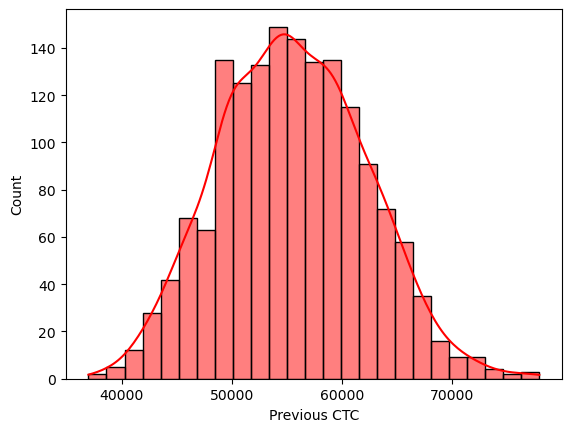

In [38]:
sns.histplot(data=df, x="Previous CTC", kde=True, color='red') #Normally Distributed

<Axes: xlabel='CTC', ylabel='Count'>

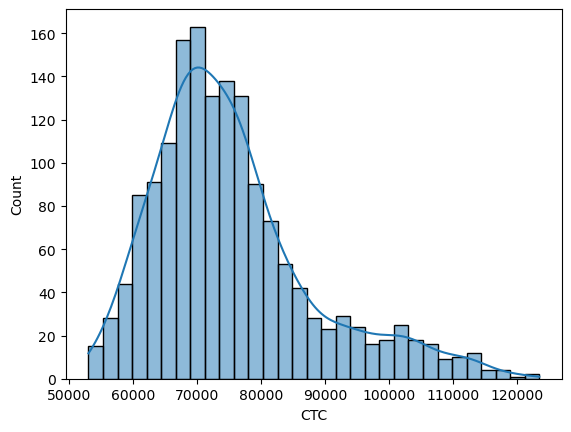

In [39]:
sns.histplot(data=df, x="CTC", kde=True) #left skewed 

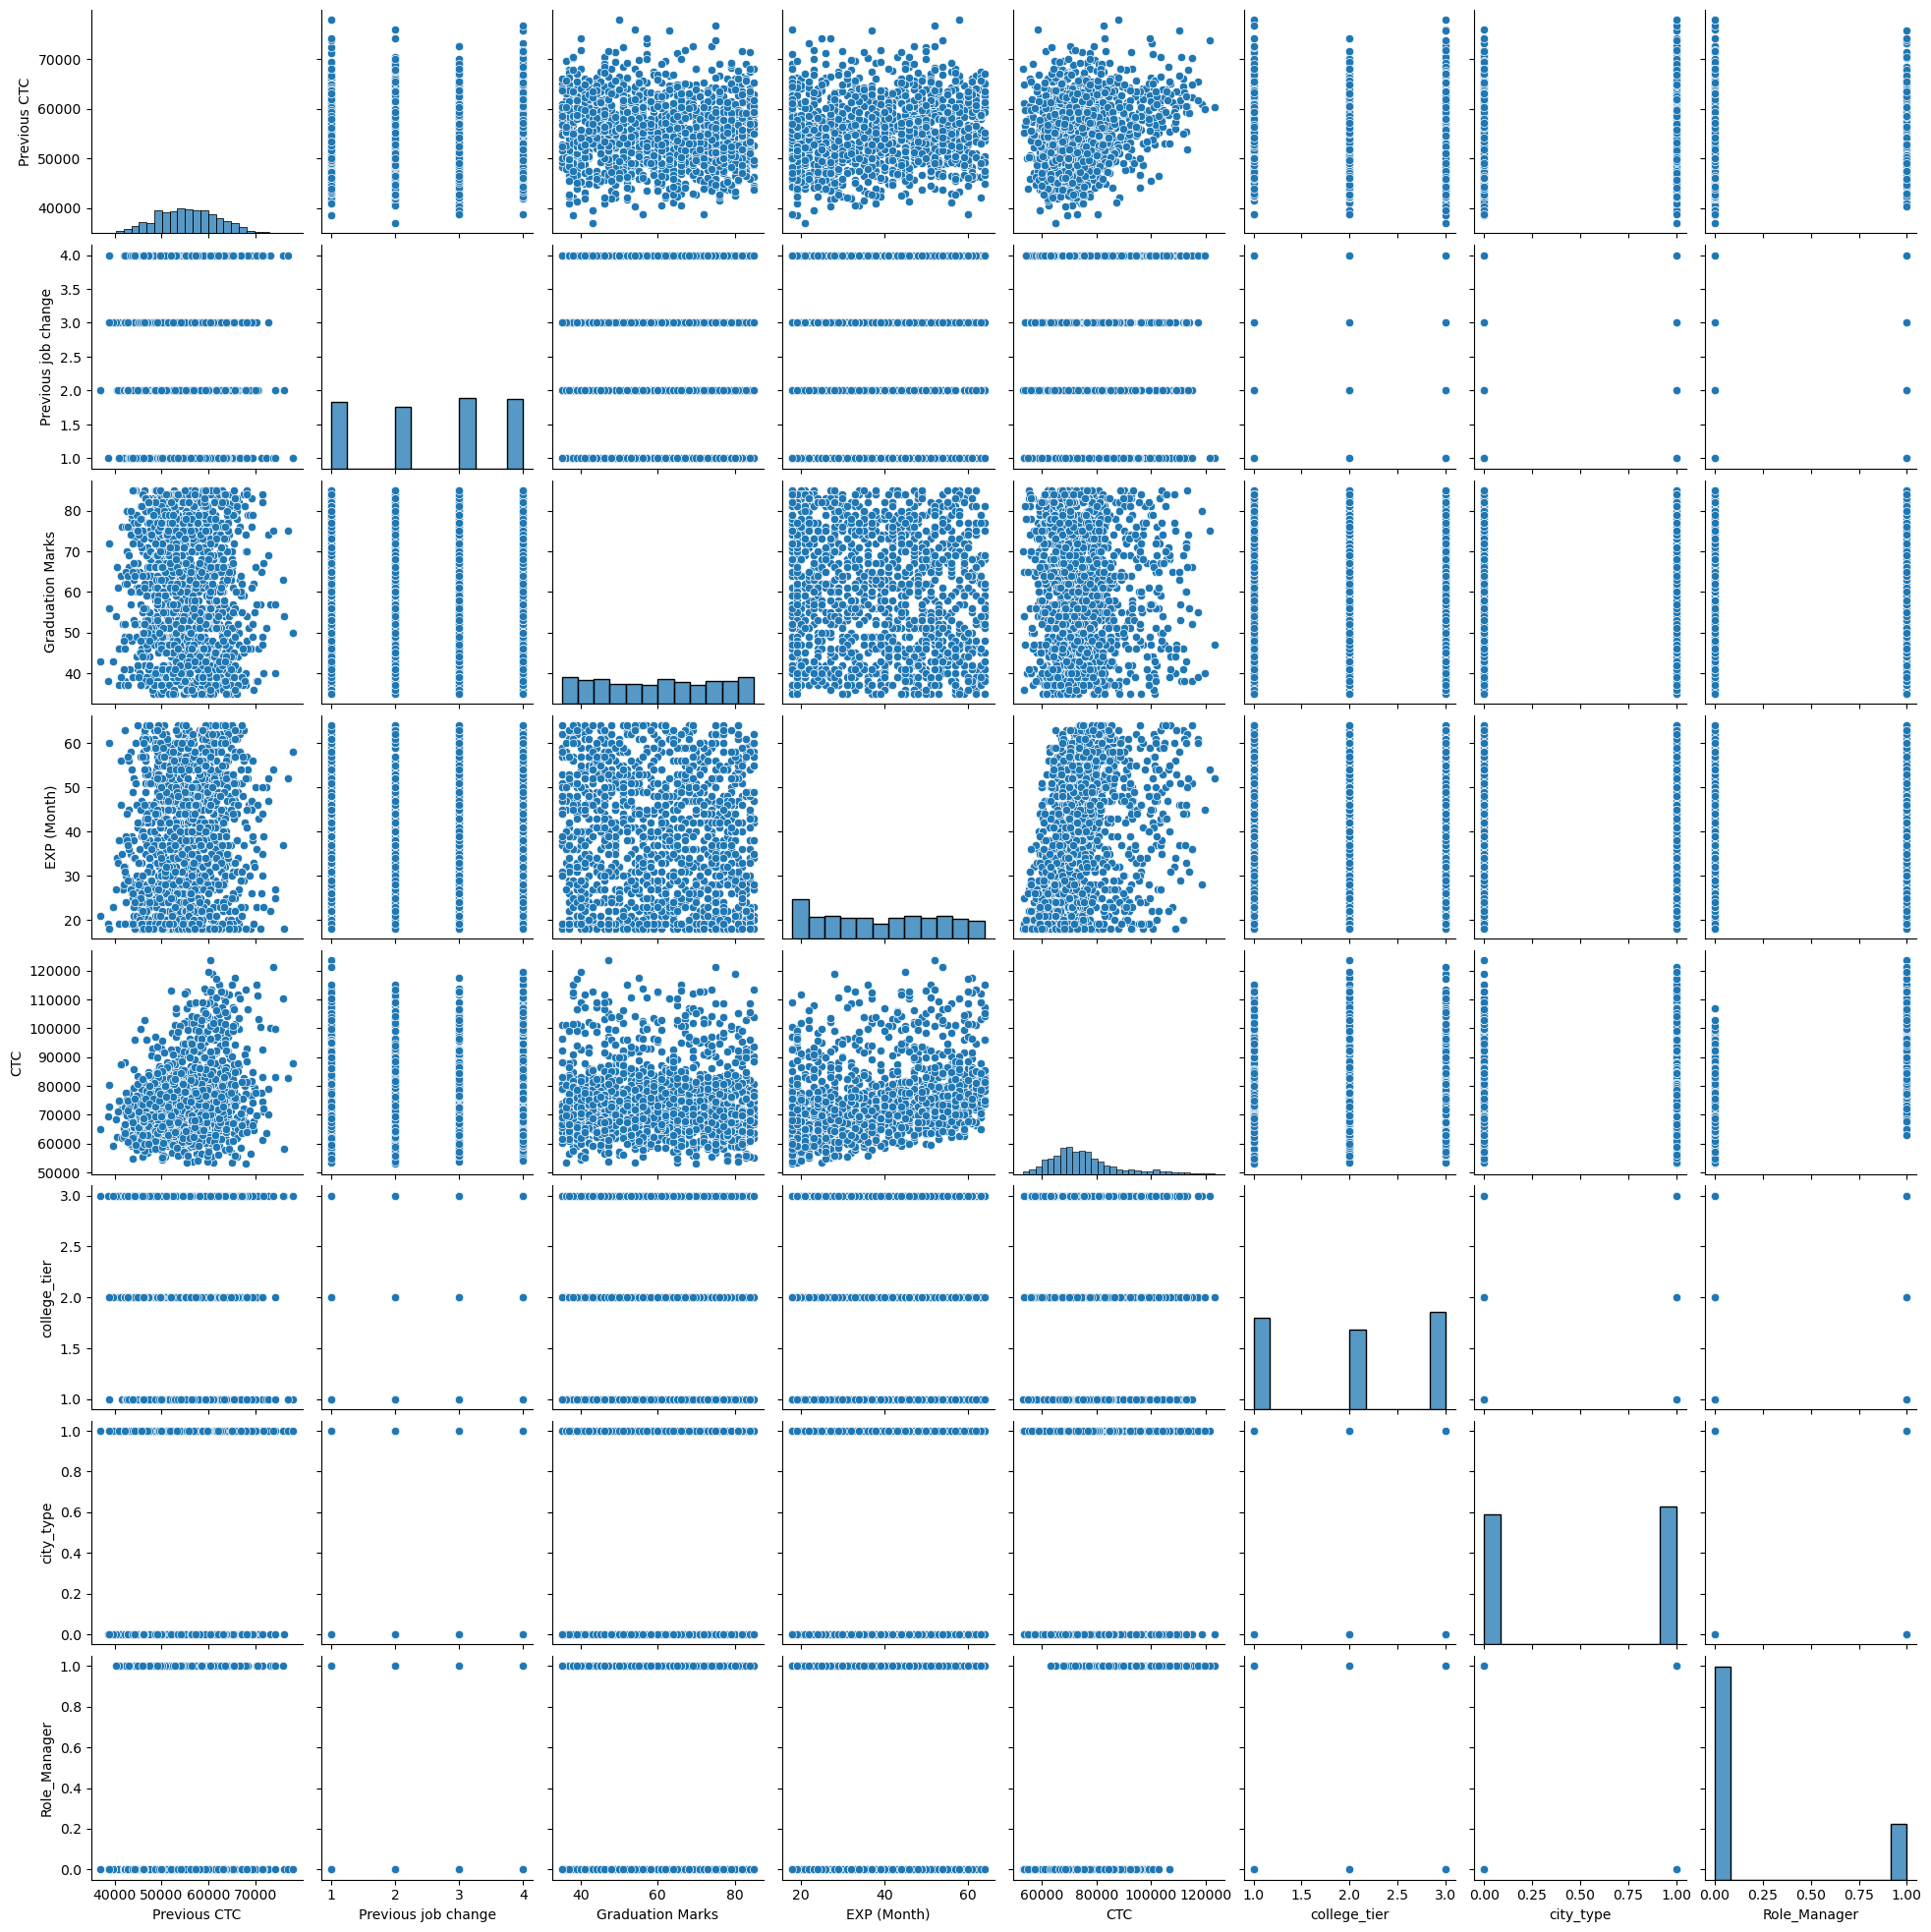

In [40]:
sns.pairplot(df) 

<Axes: ylabel='Previous CTC'>

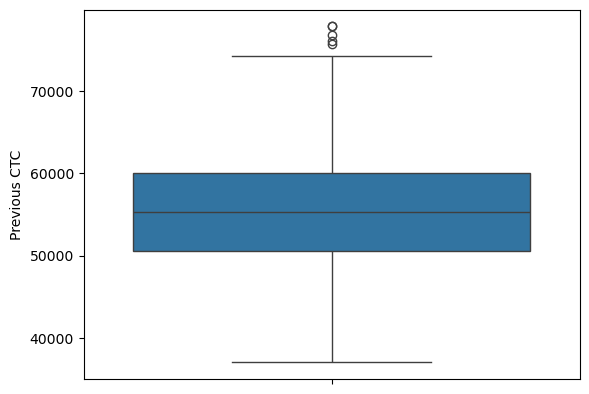

In [41]:
sns.boxplot(df['Previous CTC'])

<Axes: ylabel='CTC'>

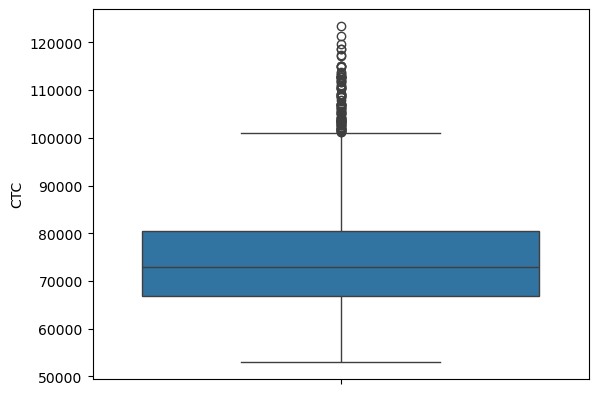

In [42]:
sns.boxplot(df['CTC'])

<font size='6'>Automated-EDA for further analysis</font>

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (1589, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,0.000000,1588.000000,Possible ID column: drop before modeling step.
Previous CTC,float64,0.000000,NA,36990.000000,77911.000000,Column has 5 outliers greater than upper bound (74495.50) or lower than lower bound(36131.50). Cap them or remove them.
Previous job change,int64,0.000000,0,1.000000,4.000000,No issue
Graduation Marks,int64,0.000000,3,35.000000,85.000000,No issue
EXP (Month),int64,0.000000,2,18.000000,64.000000,No issue
CTC,float64,0.000000,NA,53020.320000,123416.990000,Column has 94 outliers greater than upper bound (101118.15) or lower than lower bound(46372.87). Cap them or remove them.
college_tier,int64,0.000000,0,1.000000,3.000000,No issue
city_type,int64,0.000000,0,0.000000,1.000000,No issue
Role_Manager,int64,0.000000,0,0.000000,1.000000,No issue


Number of All Scatter Plots = 3


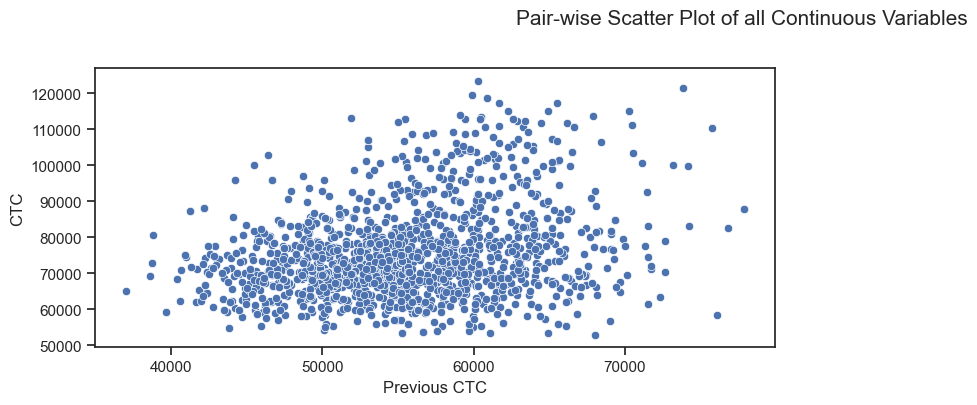

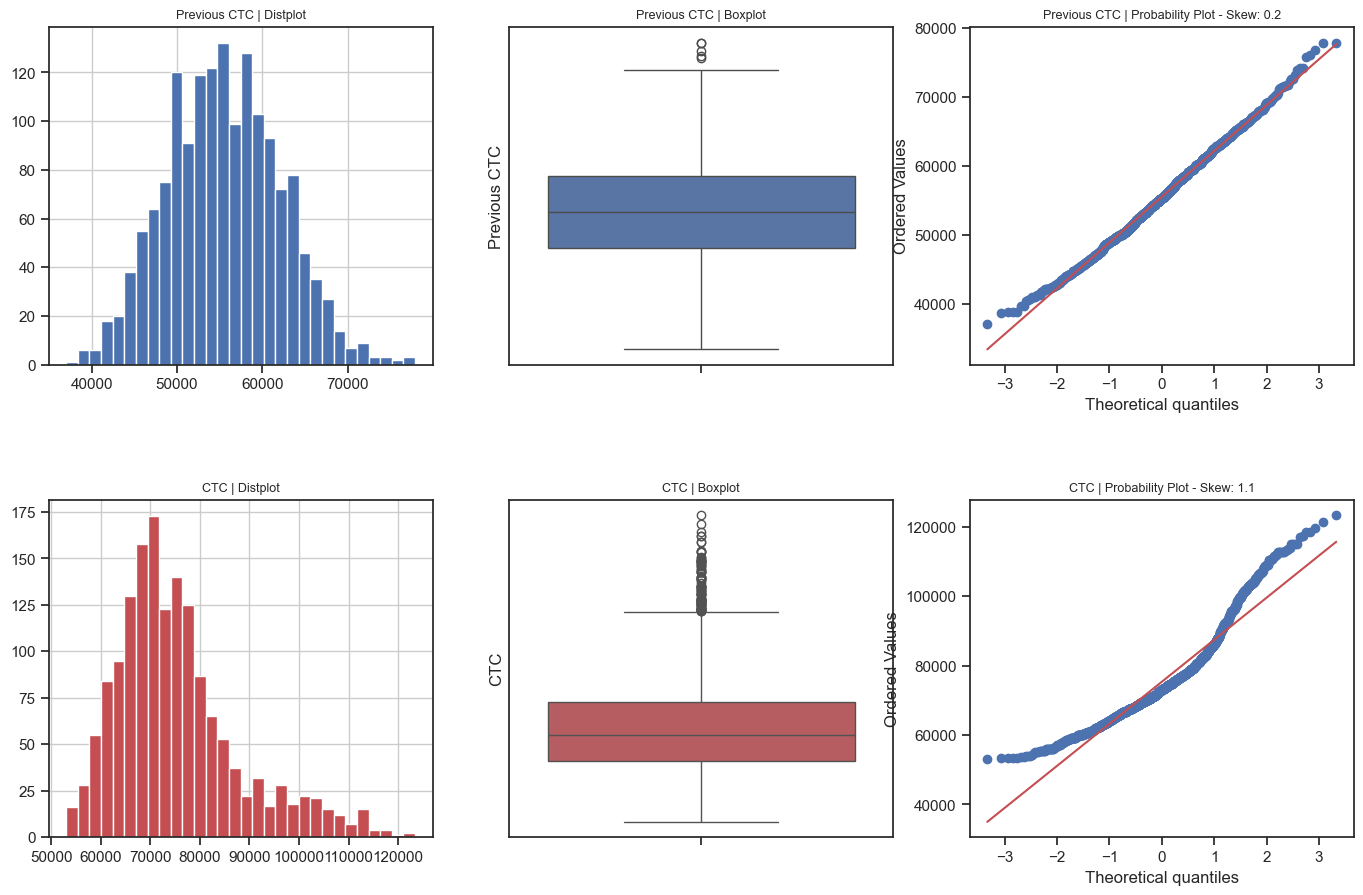

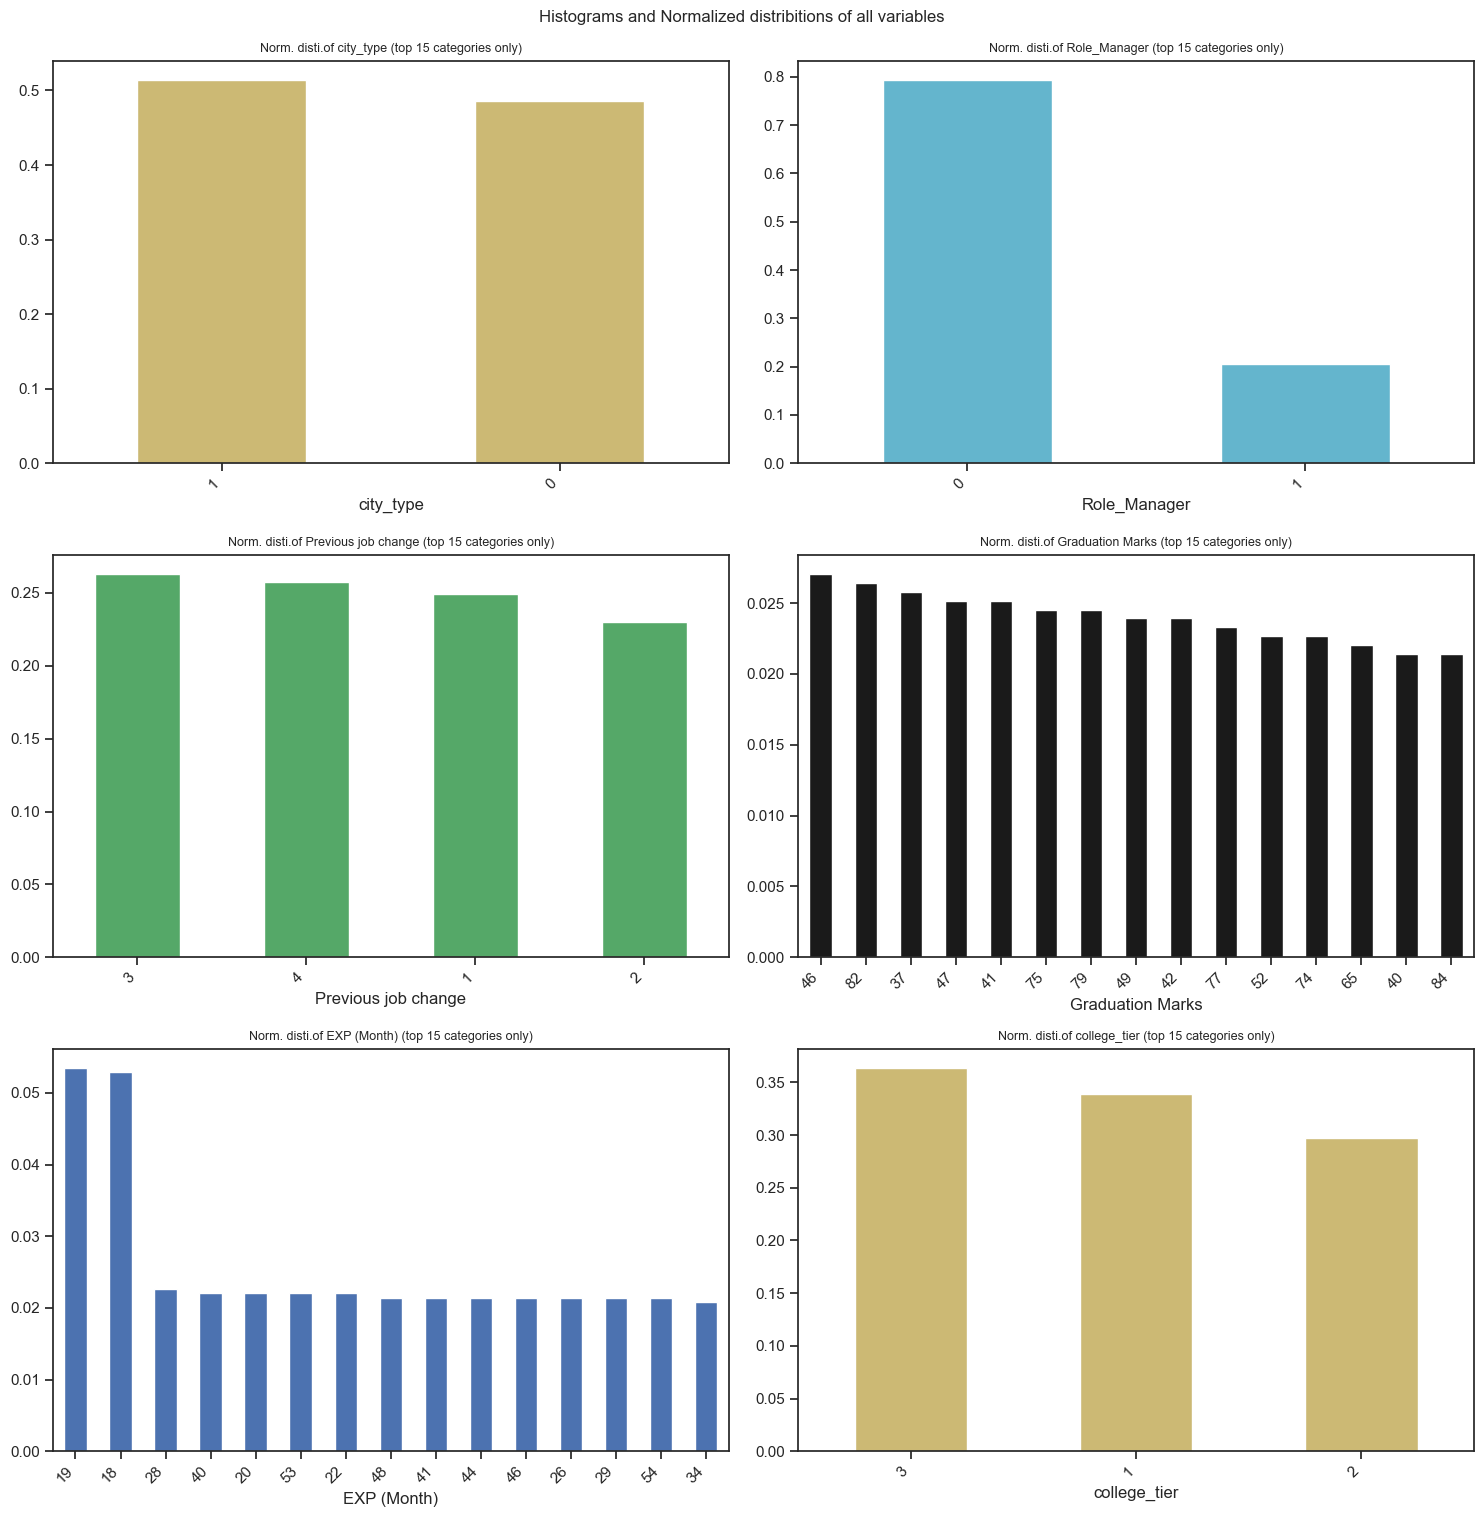

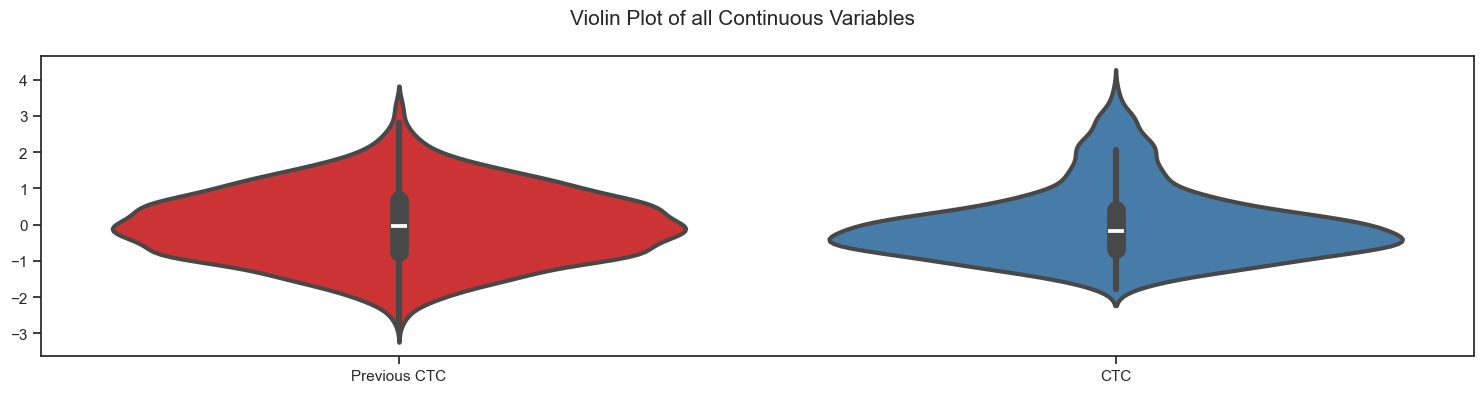

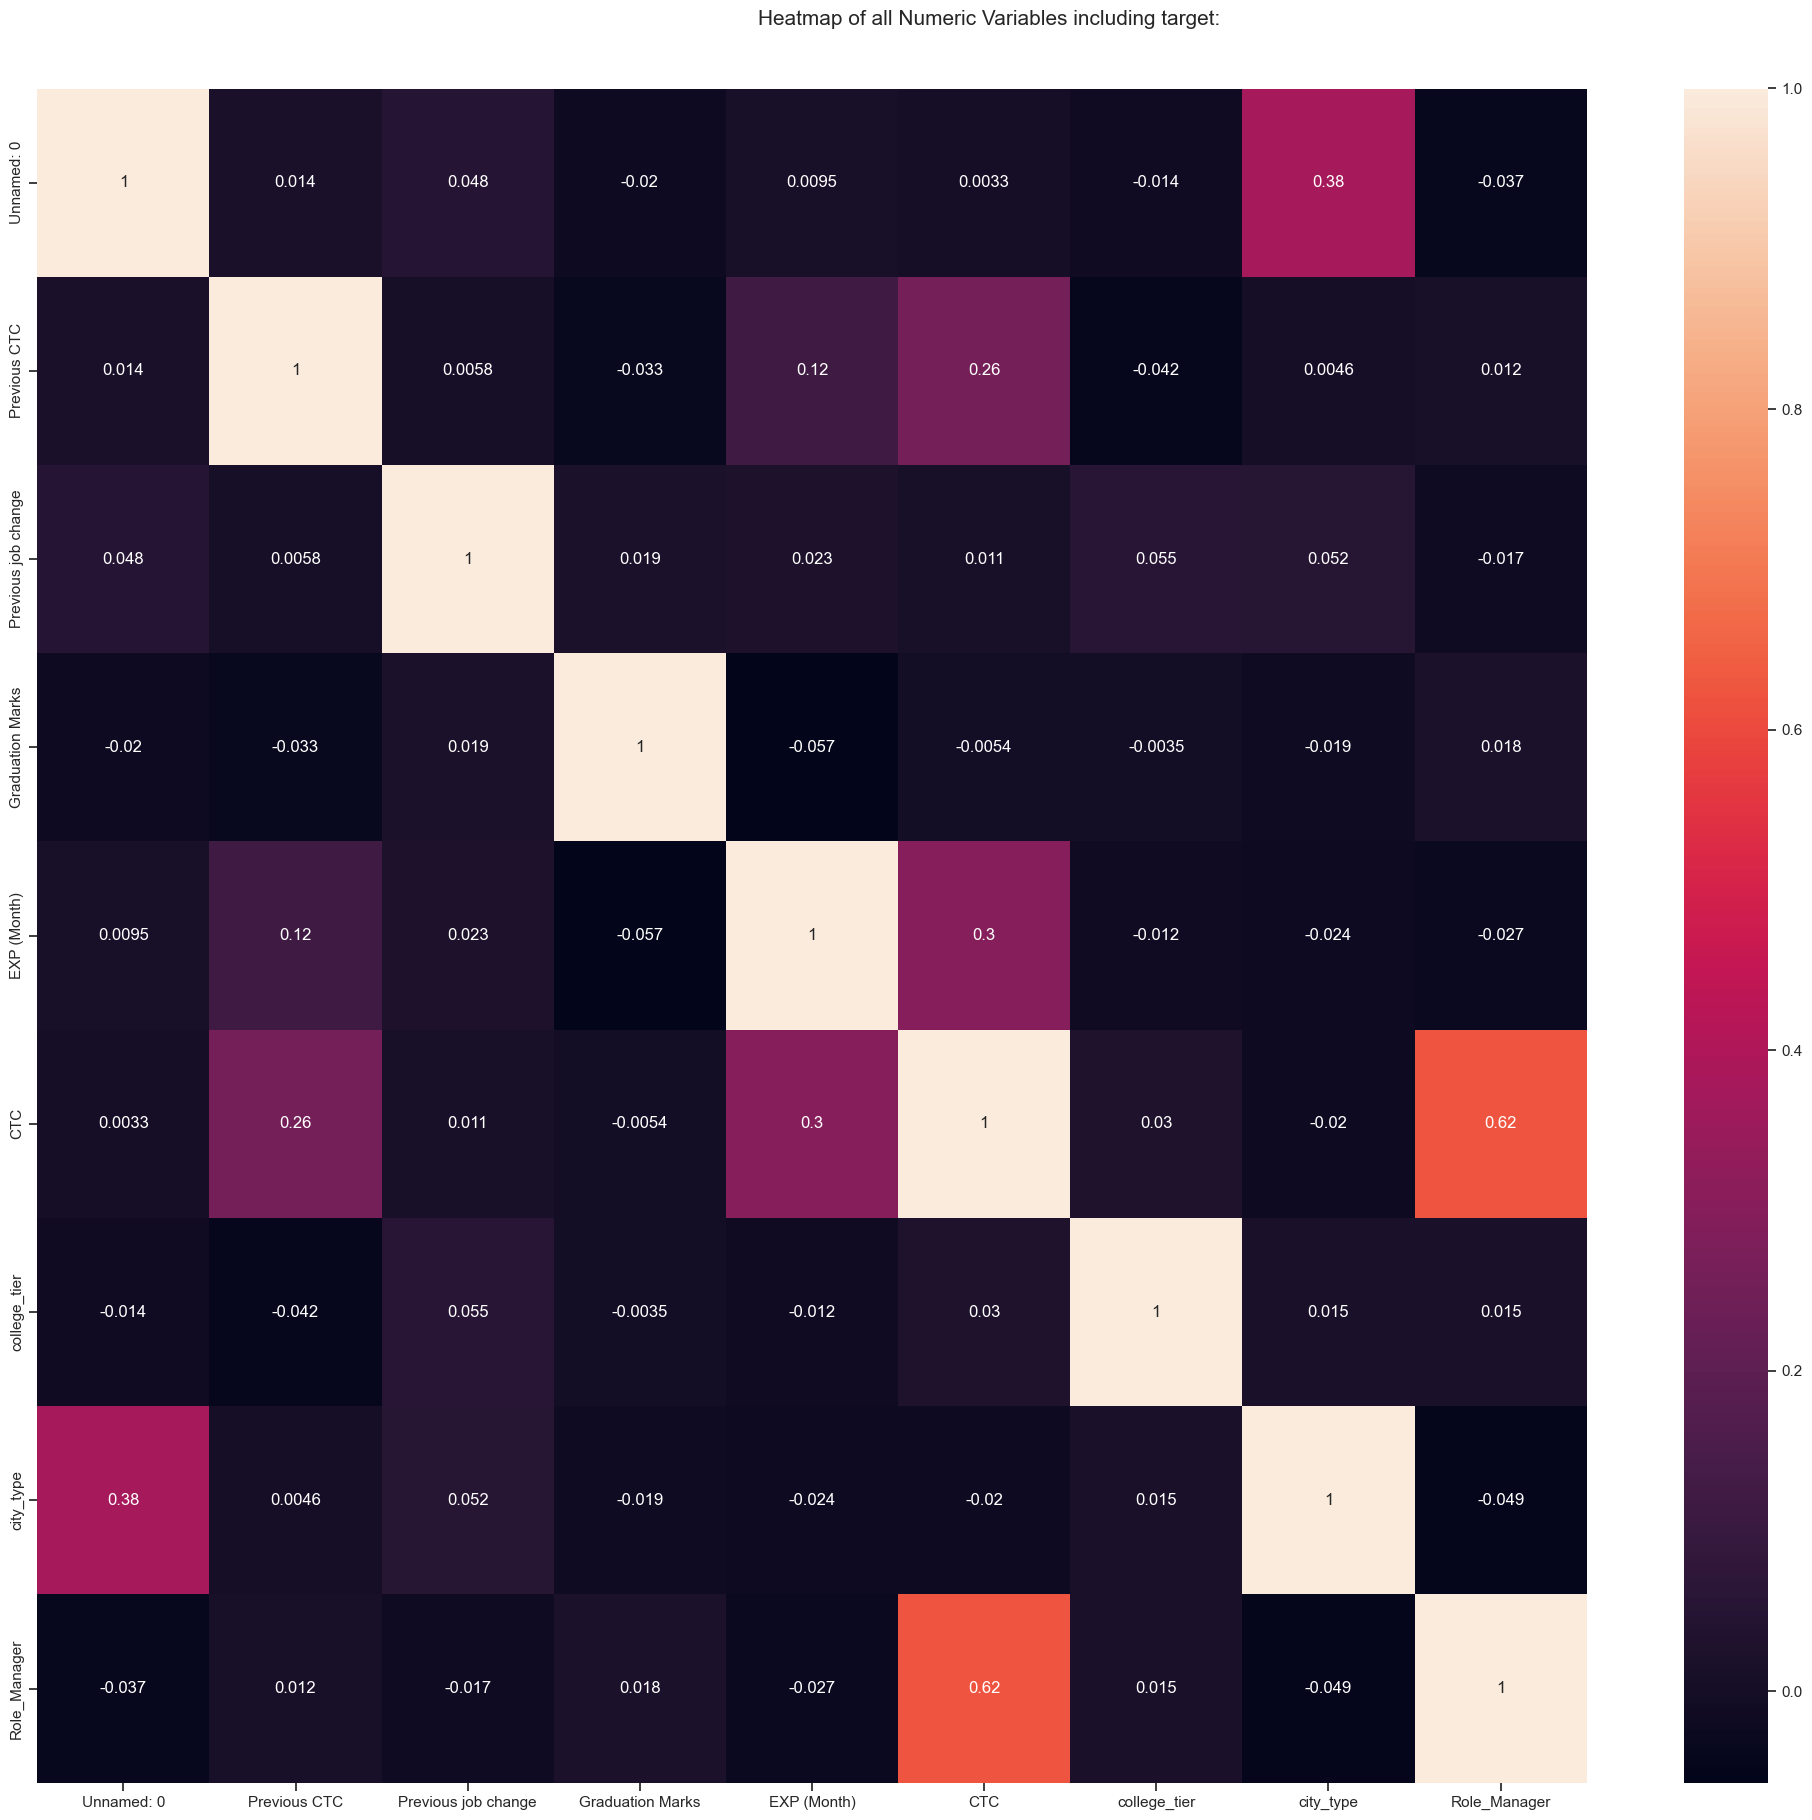

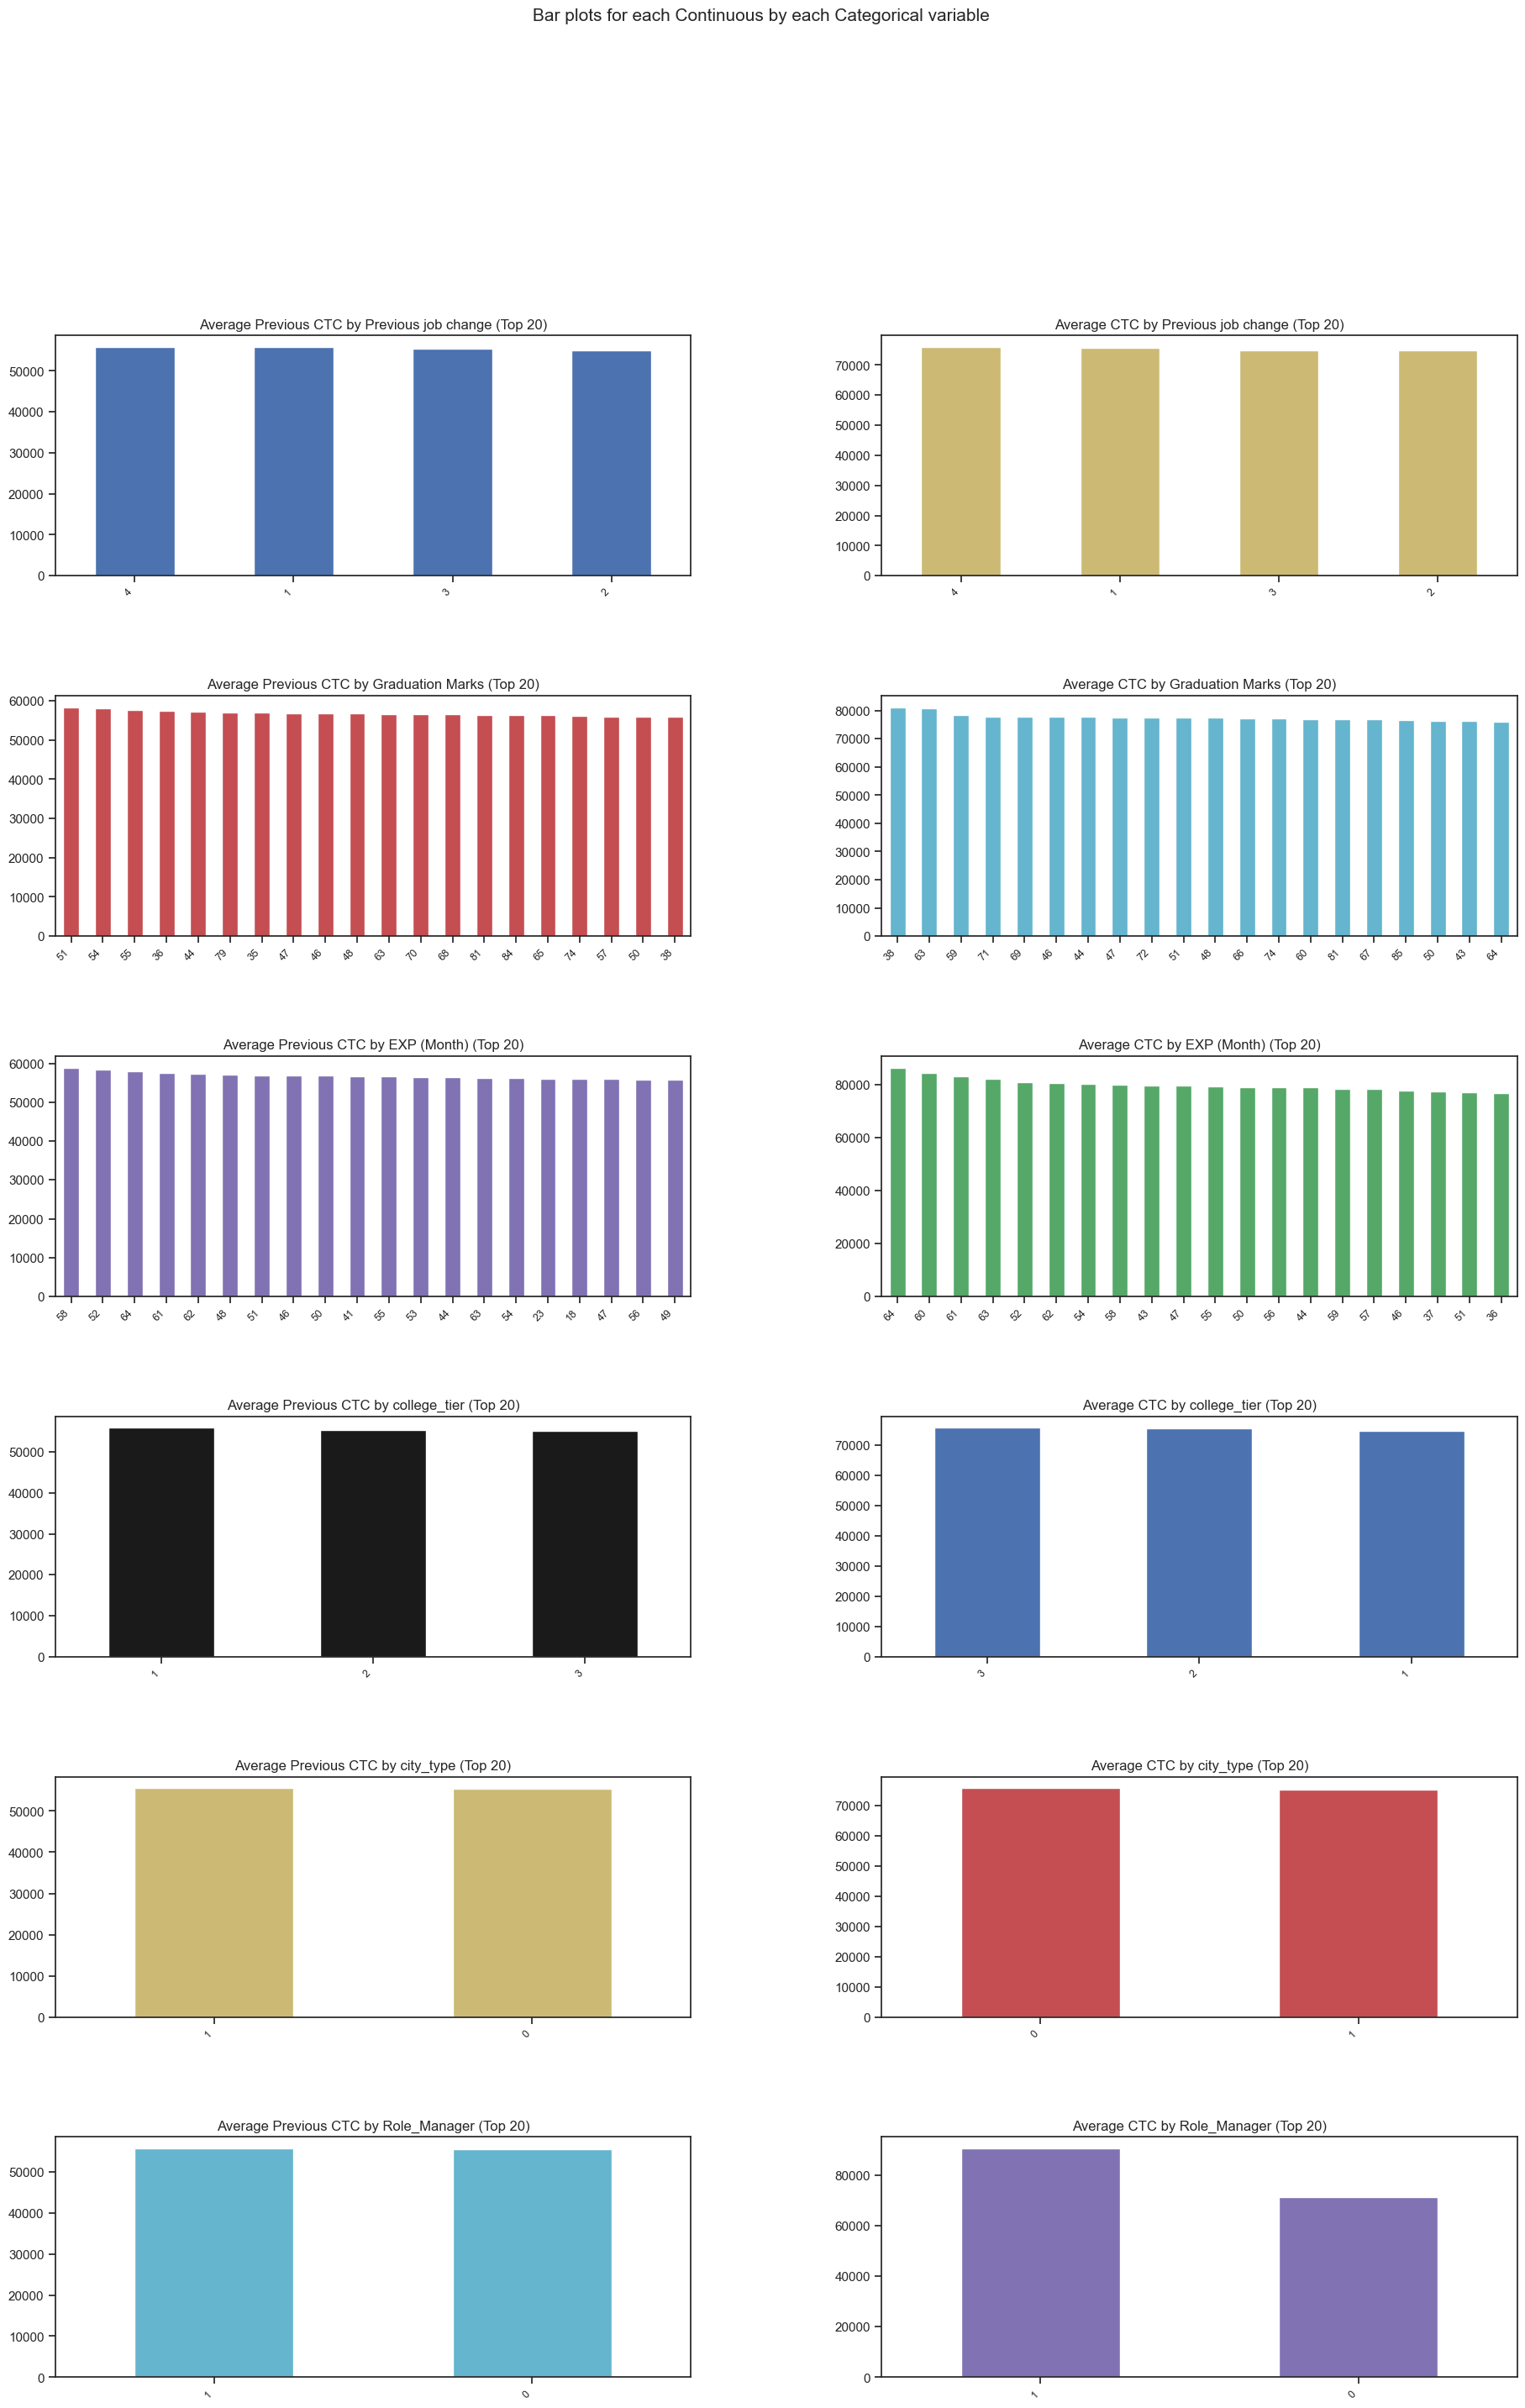

All Plots done
Time to run AutoViz = 12 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [44]:
from autoviz.AutoViz_Class import AutoViz_Class 
AV=AutoViz_Class()
df.to_csv('df.csv')
import matplotlib.pyplot as plt
%matplotlib inline
filename='df.csv'
dft = AV.AutoViz(filename)

In [45]:
#Taking 99 percentile as our highest value and 3 times of it is our highest possible value
hv=np.percentile(df['Previous CTC'], [99])[0]
df[(df['Previous CTC']>3*hv)]

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier,city_type,Role_Manager


In [46]:
#Taking 1 percentile as our lowest value and 0.3 times of it is our lowest possible value
lv=np.percentile(df['Previous CTC'], [1])[0]
df[(df['Previous CTC']<0.3*hv)]

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier,city_type,Role_Manager


In [47]:
#Taking 99 percentile as our highest value and 3 times of it is our highest possible value
hv=np.percentile(df['CTC'], [99])[0]
df[(df['CTC']>3*hv)]

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier,city_type,Role_Manager


In [48]:
#Taking 1 percentile as our lowest value and 0.3 times of it is our lowest possible value
lv=np.percentile(df['CTC'], [1])[0]
df[(df['CTC']<0.3*hv)]

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier,city_type,Role_Manager


<font size='4'> Altough EDA suggest, there exist outliers, but they are not outliers as none of them falls outside our hv(higher value) range and lv(lower value) range </font>

<font size='6'> CORRELATION MATRIX </font>

In [51]:
df.corr() #City type and Graduation Marks has inverse relation with CTC and  Exp, Prev. CTC and Role are dominant features

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier,city_type,Role_Manager
Previous CTC,1.000000,0.005756,-0.032976,0.119163,0.258000,-0.041979,0.004644,0.012321
Previous job change,0.005756,1.000000,0.019267,0.023488,0.011370,0.055060,0.051670,-0.017150
Graduation Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450,-0.003539,-0.018616,0.017858
EXP (Month),0.119163,0.023488,-0.057061,1.000000,0.301115,-0.011752,-0.023613,-0.026751
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000,0.029592,-0.020365,0.621311
college_tier,-0.041979,0.055060,-0.003539,-0.011752,0.029592,1.000000,0.014946,0.014749
city_type,0.004644,0.051670,-0.018616,-0.023613,-0.020365,0.014946,1.000000,-0.048671
Role_Manager,0.012321,-0.017150,0.017858,-0.026751,0.621311,0.014749,-0.048671,1.000000


<font size='6'> VARIABLE SEGREGATION (Independent and Dependent) </font>

In [53]:
X = df.drop('CTC', axis=1)
y = df['CTC']

In [54]:
X.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),college_tier,city_type,Role_Manager
0,55523.0,3,66,19,2,0,1
1,49292.0,4,49,19,1,0,0
2,61956.0,4,54,28,1,0,0
3,57606.0,4,78,20,1,0,0
4,42143.0,3,38,32,3,0,1


In [55]:
y.head()

0    71406.58
1    70729.63
2    71791.28
3    54071.79
4    88208.37
Name: CTC, dtype: float64

<font size='6'>DATA SPILLING (90:10)</font>

In [57]:
#Because of small dataset, 80:20 split will not very effectivee, thus 90:10 :: Train:Test will have the best performance

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1430, 7), (159, 7), (1430,), (159,))

In [58]:
X_train.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),college_tier,city_type,Role_Manager
1137,62728.0,4,71,18,2,1,0
371,61930.0,1,76,41,3,0,1
354,52782.0,1,56,19,3,0,0
711,71473.0,4,84,44,1,1,1
173,61439.0,2,56,37,3,0,1


In [59]:
X_test.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),college_tier,city_type,Role_Manager
1079,53511.0,1,84,58,3,1,0
405,50140.0,2,42,55,3,0,0
1492,56970.0,3,43,46,1,0,0
239,53938.0,1,61,39,1,0,1
610,63523.0,3,45,33,1,1,0


<font size='6'> FEATURE ENGINEERING (STANDARDIZING) </font>

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [62]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [64]:
X_test_scaled.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),college_tier,city_type,Role_Manager
0,-0.316388,-1.364268,1.617454,1.342940,1.170393,0.960231,-0.498907
1,-0.825279,-0.470588,-1.216063,1.130388,1.170393,-1.041416,-0.498907
2,0.205787,0.423092,-1.148598,0.492733,-1.217142,-1.041416,-0.498907
3,-0.251928,-1.364268,0.065766,-0.003220,-1.217142,-1.041416,2.004381
4,1.195036,0.423092,-1.013669,-0.428324,-1.217142,0.960231,-0.498907


In [65]:
X_test_scaled.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),college_tier,city_type,Role_Manager
0,-0.316388,-1.364268,1.617454,1.342940,1.170393,0.960231,-0.498907
1,-0.825279,-0.470588,-1.216063,1.130388,1.170393,-1.041416,-0.498907
2,0.205787,0.423092,-1.148598,0.492733,-1.217142,-1.041416,-0.498907
3,-0.251928,-1.364268,0.065766,-0.003220,-1.217142,-1.041416,2.004381
4,1.195036,0.423092,-1.013669,-0.428324,-1.217142,0.960231,-0.498907


<font size='6'> MODEL SELECTION </font>

In [67]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Bagging Regressor": BaggingRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

# Dictionaries to store mean squared errors and R² scores
mse_train = {}
mse_test = {}
train_r2_scores = {}
test_r2_scores = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Calculate mean squared errors
    train_mean_squared_error = mean_squared_error(y_train, y_train_pred)
    test_mean_squared_error = mean_squared_error(y_test, y_test_pred)

    # Store the mean squared errors and R² scores in the dictionaries
    mse_train[model_name] = train_mean_squared_error
    mse_test[model_name] = test_mean_squared_error
    train_r2_scores[model_name] = train_r2
    test_r2_scores[model_name] = test_r2

    # Print the metrics with a space after each model's performance
    print(f"{model_name} - Train: R² Score = {train_r2:.4f}")
    print(f"{model_name} - Test: R² Score = {test_r2:.4f}")
    print(f"{model_name} - Train: mean_squared_error = {train_mean_squared_error:.4f}")
    print(f"{model_name} - Test: mean_squared_error = {test_mean_squared_error:.4f}")
    print("\n")


# Find the model with the minimum mean squared error for training and testing
min_train_model = min(mse_train, key=mse_train.get)
min_test_model = min(mse_test, key=mse_test.get)

# Find the model with the maximum R² score for training and testing
max_train_r2_model = max(train_r2_scores, key=train_r2_scores.get)
max_test_r2_model = max(test_r2_scores, key=test_r2_scores.get)

print(f"Model with minimum training mean squared error: {min_train_model} ({mse_train[min_train_model]:.4f})")
print(f"Model with minimum testing mean squared error: {min_test_model} ({mse_test[min_test_model]:.4f})")
print(f"Model with maximum training R² score: {max_train_r2_model} ({train_r2_scores[max_train_r2_model]:.4f})")
print(f"Model with maximum testing R² score: {max_test_r2_model} ({test_r2_scores[max_test_r2_model]:.4f})")


Linear Regression - Train: R² Score = 0.5211
Linear Regression - Test: R² Score = 0.6209
Linear Regression - Train: mean_squared_error = 73771335.5767
Linear Regression - Test: mean_squared_error = 74133304.5717


Decision Tree Regression - Train: R² Score = 1.0000
Decision Tree Regression - Test: R² Score = 0.6077
Decision Tree Regression - Train: mean_squared_error = 0.0000
Decision Tree Regression - Test: mean_squared_error = 76698055.7623


Random Forest Regression - Train: R² Score = 0.9496
Random Forest Regression - Test: R² Score = 0.7188
Random Forest Regression - Train: mean_squared_error = 7757481.2732
Random Forest Regression - Test: mean_squared_error = 54986963.3785


Ridge Regression - Train: R² Score = 0.5211
Ridge Regression - Test: R² Score = 0.6208
Ridge Regression - Train: mean_squared_error = 73771374.5197
Ridge Regression - Test: mean_squared_error = 74147687.1428


Lasso Regression - Train: R² Score = 0.5211
Lasso Regression - Test: R² Score = 0.6208
Lasso Regress

<font size='6'>HYPERPARAMER TUNING FOR SELECTEED MODEL </font>

In [69]:
from sklearn.model_selection import GridSearchCV

#parameters to check the performance with cross validation 
param_grid = {
    'n_estimators': [300,500,700,900],
    'max_features' : [3,4,5,6],
    'random_state' : [42],
    'max_depth' : [None, 10,20],
    'min_samples_split' : [2,4], 
    'min_samples_leaf' : [1,2,3]
}

#Difining Grid Search Object and here scoring is done by negative mean squared error
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=2)

In [70]:
# fitting the training data into the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [300, 500, 700, 900],
                         'random_state': [42]},
             scoring='neg_mean_squared_error', verbose=2)

In [71]:
#choosing the best parameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 900, 'random_state': 42}


In [72]:
#As per the best parameter, estimator is chosen
optimized_RandomForest = grid_search.best_estimator_

In [73]:
#Performance on training data
r2_score(y_train, optimized_RandomForest.predict(X_train))

0.9513065771695312

In [74]:
#Performance on Testing data
r2_score(y_test, optimized_RandomForest.predict(X_test))

0.7363437971981195

<font size='6'> SUMMARY <font>

(a). Random Forest Regression is selected because of its minimum testing mean squared error and maximum testing R² score

(b). Random Forest Regressor model is better than all other models which were tested beacuse it of following reasons: 
1. Random Forest can capture non-linear relationships between features and the target variable.
2. It is less sensitive to outliers compared to models like linear regression.
3. Random Forest can provide insights into feature importance, helping to understand which features contribute most to the prediction.
4. By averaging multiple trees, Random Forest reduces the risk of overfitting that is typically seen with a single decision tree.
5. Training can be parallelized since each tree in the forest can be built independently.
Basically, it it like asking the opinion from differnt exert and then dicide which should be the result in real life term. 
 

(c). By Hyperparameter Tuning, the performance of Random forest can be enhanced further. 
In this case, data is little bit overfitted because the dataset is not large enough to train the model, even if 90% of data 
goes to training and 10% goes to testing, it seems overfitted.
After Hyperparameter Tuning, the accuracy in terms of R-square has increased a little bit, but for further enhancement. New data has to be added in training the model. 
Hyperparameter: 
1. n_estimators - No. of trees
2. max_depth - How much depth is allowed to the tree to grow
3. min_samples_split - min samples required to split the internal nodes
4. min_samples_leaf - min samples required at leaf node
5. max_features - How many no. of columns are required for buding the model

## <b> 1. Your views about the problem statement?

The problem statement involves predicting the salary of newly hired employees at TechWorks Consulting using given data. This task is well-suited for a regression model, as the goal is to predict a continuous value (salary) based on various features such as college tier, city type, previous CTC, role, experience, and academic record. The key challenges will be handling categorical variables, dealing with potential outliers, and ensuring that the model generalizes well to new data.

## <b> 2. What will be your approach to solving this task?

My approach to solving this task will be as follows:

1. Data Gathering: 
    ##### (a) Gathing the data from given files. 
    ##### (b) Converting them into suitable format
    ##### (c) Merging the data after cleaning

3. Data Preprocessing: 
    ##### (a) Convert categorical variables (college tier, city type, and role) into numerical values.
    ##### (b) Handle missing values and outliers (if any) by performing EDA  

6. Data Splitting (90:10) and Feature Enginerring: 
    ##### (a) Diving the data into X = Independent Variables and Y = Dependent or Resultant Variable
    ##### (b) Split the data into training and testing sets in 90:10 = Train:Test Dataset 
    ##### (c) 90% data goes to training data(usually 80% data goes to training but givne dataset is not enough to do that) and 10% goes to testing
    ##### (d) Select the most relevant features for the model.
    ##### (e) Standardizing/Normalization the feature so that one feature will not dominate the other and data comes under common scale
   
8. Model Selection:
   #####  (a) Experiment with various regression models (Linear Regression, Decision Tree, Random Forest, etc.).
   #####  (b) Evaluate models using appropriate metrics (Mean Squared Error, R-Squared).

9. Hyperparameter Tuning:
    ##### (a) Optimize the hyperparameters of the selected model to improve performance.

10. Deployment:
    ##### (a) Now the selected model is ready for deployment. 

## <b> 3. What were the available ML model options you had to perform this task?

#### <b> The available ML model options for this task included:
#####    "Linear Regression"
#####    "Decision Tree Regression"
#####    "Random Forest Regression"
#####    "Ridge Regression"
#####    "Lasso Regression"
#####    "Bagging Regressor"
#####    "Extra Trees Regressor"
#####    "Gradient Boosting Regressor"

## <b> 4. Which model’s performance is best and what could be the possible reason for that?

#### The Random Forest Regressor is likely to perform the best for this task. The possible reasons for this include: <b>

##### 1. Handling of Non-Linearity: Random Forest can capture non-linear relationships between the features and the target variable better than a simple linear regression.
##### 2. Robustness to Overfitting: By averaging multiple decision trees, Random Forest reduces the risk of overfitting compared to a single decision tree.
##### 3. Feature Importance: Random Forest provides insights into feature importance, helping to understand which features are most influential in predicting salary.
##### 4. Handling of Outliers: Random Forest is less sensitive to outliers compared to other models like Linear Regression.

## <b>5. What steps can you take to improve this selected model’s performance even further?

By Hyperparameter Tuning, the performance of Random forest can be enhanced further. In this case, data is little bit overfitted because the dataset is not large enough to train the model, even if 90% of data goes to training and 10% goes to testing, it seems overfitted. After Hyperparameter Tuning, the accuracy in terms of R-square has increased a little bit, but for further enhancement. New data has to be added in training the model. 

#### Hyperparameter:

1. n_estimators - No. of trees

2. max_depth - How much depth is allowed to the tree to grow

3. min_samples_split - min samples required to split the internal nodes

4. min_samples_leaf - min samples required at leaf node

5. max_features - How many no. of columns are required for buding the model